In [514]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [558]:
dead_2021 = pd.read_fwf('./deces-1970.txt',widths=(80,1,4,2,2,5,30,30,4,2,2,5,9),header=0,names=('NomPrenom','Sexe','DOB_AAAA','DOB_MM','DOB_DD','CodeLieuxNaissance','AdressseNaissance','Etranger','DOD_AAAA','DOD_MM','DOD_DD','CodeLieuDeces','ActeDecesNumber'))

In [559]:
#Remove '/' Col 1
dead_2021.iloc[:,0]=dead_2021.iloc[:,0].str[:-1]
#Split Name * Col 1
dead_2021[['Last','First']] = dead_2021.NomPrenom.str.split("*",expand=True)
dead_2021.drop(columns='NomPrenom',inplace=True)
# shift column to first position
first = dead_2021.pop('Last')
second = dead_2021.pop('First')

dead_2021.insert(0, 'Last', first)
dead_2021.insert(0, 'First', second)
dead_2021.head()

,First,Last,Sexe,DOB_AAAA,DOB_MM,DOB_DD,CodeLieuxNaissance,AdressseNaissance,Etranger,DOD_AAAA,DOD_MM,DOD_DD,CodeLieuDeces,ActeDecesNumber
0,ERIC JEAN REMY,GRANGEON,1,1969,3,29,1004,AMBERIEU-EN-BUGEY,NaN,1970,4,25,69383,1059
1,PHILIPPE,VELLET,1,1970,2,1,1004,AMBERIEU-EN-BUGEY,NaN,1970,2,3,1004,12
2,LYDIE,PRESSAVIN,2,1970,4,6,1004,AMBERIEU-EN-BUGEY,NaN,1970,4,6,1004,33
3,MARIE-SYLVIA MARTINE,DOUAT,2,1970,7,8,1004,AMBERIEU-EN-BUGEY,NaN,1970,7,8,1053,457
4,FELIX,ROSIER,1,1891,11,25,1004,AMBERIEU-EN-BUGEY,NaN,1970,11,14,30012,15


In [532]:
dead_2021[dead_2021['DOB_DD']==0]

,First,Last,Sexe,DOB_AAAA,DOB_MM,DOB_DD,CodeLieuxNaissance,AdressseNaissance,Etranger,DOD_AAAA,DOD_MM,DOD_DD,CodeLieuDeces,ActeDecesNumber
18,MOHAMED,BAKHTI,1,1915,0,0,99350,BENI DRAR,MAROC,2021,1,14,01004,13
132,MARIA,PIPERINI,2,1927,6,0,99127,RANZANICO,ITALIE,2021,1,1,01068,1
236,ROBERT,RIOS,1,1942,4,0,92352,DEPARTEMENT D'ORAN,NaN,2021,1,19,01238,1
276,MOHAMADI,TALBI,1,1937,0,0,99350,"BAB JANANE, OULAD JDOU, BNI FE",MAROC,2021,1,3,01283,4
300,EL MEHDI,LAZRAK,1,1934,0,0,99350,"AIN HAMRA, BENI OULID",MAROC,2021,1,25,01283,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671295,MASSIRE,KOITA,1,1933,0,0,99335,BAMAKO,MALI,2021,8,18,99335,1585
671342,NOUREDDINE,GHAZIRI,1,1932,0,0,99205,BEYROUTH,LIBAN,2020,11,22,99205,590
671346,SALOMON,EZRA,1,1937,4,0,99301,LE CAIRE,EGYPTE,2021,3,24,99207,1969
671381,NEDJMA,DJEDOU,2,1926,0,0,99352,AFLOU,ALGERIE,2021,8,27,99207,2199


In [533]:
#dead_2021["DOB"] = pd.to_datetime(dead_2021["DOB"], errors='ignore', dayfirst=False,format="%Y%m%d")
#dead_2021["DOD"] = pd.to_datetime(dead_2021["DOD"], errors='ignore', dayfirst=False,format="%Y%m%d")
#dead_2021.head()
#test=dead_2021[int(repr(dead_2021["DOB"])[-1])=='1']
#last_digit = int(repr(n)[-1])

In [534]:
test[test['DOB_DD']==0]


#int(dead_2021.iloc[1,3])[-1]

#test=dead_2021[[(str(dead_2021["DOB"])[-1])=='0']]


,NomPrenom,Sexe,DOB_AAAA,DOB_MM,DOB_DD,CodeLieuxNaissance,AdressseNaissance,Etranger,DOD_AAAA,DOD_MM,DOD_DD,CodeLieuDeces,ActeDecesNumber
18,BAKHTI*MOHAMED/,1,1915,0,0,99350,BENI DRAR,MAROC,2021,1,14,01004,13
132,PIPERINI*MARIA/,2,1927,6,0,99127,RANZANICO,ITALIE,2021,1,1,01068,1
236,RIOS*ROBERT/,1,1942,4,0,92352,DEPARTEMENT D'ORAN,NaN,2021,1,19,01238,1
276,TALBI*MOHAMADI/,1,1937,0,0,99350,"BAB JANANE, OULAD JDOU, BNI FE",MAROC,2021,1,3,01283,4
300,LAZRAK*EL MEHDI/,1,1934,0,0,99350,"AIN HAMRA, BENI OULID",MAROC,2021,1,25,01283,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671295,KOITA*MASSIRE/,1,1933,0,0,99335,BAMAKO,MALI,2021,8,18,99335,1585
671342,GHAZIRI*NOUREDDINE/,1,1932,0,0,99205,BEYROUTH,LIBAN,2020,11,22,99205,590
671346,EZRA*SALOMON/,1,1937,4,0,99301,LE CAIRE,EGYPTE,2021,3,24,99207,1969
671381,DJEDOU*NEDJMA/,2,1926,0,0,99352,AFLOU,ALGERIE,2021,8,27,99207,2199


In [560]:
dead_2021["Age"]= dead_2021["DOD_AAAA"] + dead_2021["DOD_MM"]/12 + dead_2021["DOD_DD"]/30 - dead_2021["DOB_AAAA"] + dead_2021["DOB_MM"]/12 + dead_2021["DOB_DD"]/30

pd.to_numeric(dead_2021['Age'],downcast='integer')
dead_2021

,First,Last,Sexe,DOB_AAAA,DOB_MM,DOB_DD,CodeLieuxNaissance,AdressseNaissance,Etranger,DOD_AAAA,DOD_MM,DOD_DD,CodeLieuDeces,ActeDecesNumber,Age
0,ERIC JEAN REMY,GRANGEON,1,1969,3,29,1004,AMBERIEU-EN-BUGEY,NaN,1970,4,25,69383,1059,3.383333
1,PHILIPPE,VELLET,1,1970,2,1,1004,AMBERIEU-EN-BUGEY,NaN,1970,2,3,1004,12,0.466667
2,LYDIE,PRESSAVIN,2,1970,4,6,1004,AMBERIEU-EN-BUGEY,NaN,1970,4,6,1004,33,1.066667
3,MARIE-SYLVIA MARTINE,DOUAT,2,1970,7,8,1004,AMBERIEU-EN-BUGEY,NaN,1970,7,8,1053,457,1.700000
4,FELIX,ROSIER,1,1891,11,25,1004,AMBERIEU-EN-BUGEY,NaN,1970,11,14,30012,15,82.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27000,MURIEL LUCIENNE,RICHARD,2,1970,1,8,95680,VILLIERS-LE-BEL,NaN,1970,1,10,95680,9,0.766667
27001,ERIC,BARLAGNE,1,1970,1,18,95680,VILLIERS-LE-BEL,NaN,1970,1,23,95277,47,1.533333
27002,FRANCK DENIS,CHAPUIS,1,1970,1,26,95680,VILLIERS-LE-BEL,NaN,1970,1,30,95277,59,2.033333
27003,CARLOS MICHEL,FELICES-ROBLES,1,1970,3,8,95680,VILLIERS-LE-BEL,NaN,1970,3,11,95277,115,1.133333


<BarContainer object of 7 artists>

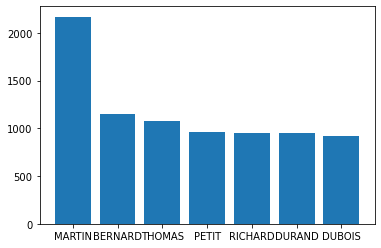

In [536]:
NomFamille=dead_2021['Last'].value_counts()
NomFamille2=NomFamille[0:7]
plt.bar(NomFamille2.index,NomFamille2.values)

In [537]:
# test.iloc[:,0]=test.iloc[:,0].str[:-1]
#test['DOB']=test['DOB'].str[:4] + '-' + test['DOB'].str[5:7] + '-' test['DOB'].str[8:10]

In [561]:
Meuf=dead_2021[dead_2021['Sexe']==1]
Kem=dead_2021[dead_2021['Sexe']==2]

(array([2.1900e+02, 7.9600e+02, 3.3600e+02, 7.5000e+01, 6.5000e+01,
        3.7000e+01, 3.3000e+01, 2.9000e+01, 3.1000e+01, 2.7000e+01,
        3.5000e+01, 4.7000e+01, 5.1000e+01, 6.4000e+01, 5.1000e+01,
        6.3000e+01, 1.1100e+02, 1.1400e+02, 9.9000e+01, 1.1900e+02,
        9.8000e+01, 1.2400e+02, 1.1100e+02, 1.2200e+02, 1.6500e+02,
        1.6500e+02, 1.9300e+02, 2.1400e+02, 2.1400e+02, 2.8700e+02,
        2.8800e+02, 3.2700e+02, 3.7000e+02, 4.3200e+02, 5.0300e+02,
        5.1600e+02, 5.5200e+02, 6.4900e+02, 7.5500e+02, 8.7700e+02,
        1.1070e+03, 1.1990e+03, 1.3440e+03, 1.5070e+03, 1.6530e+03,
        1.7960e+03, 1.9750e+03, 2.2190e+03, 2.4590e+03, 2.6130e+03,
        3.0020e+03, 3.1920e+03, 3.5810e+03, 3.8870e+03, 4.0020e+03,
        4.4880e+03, 4.8140e+03, 5.5280e+03, 5.8880e+03, 6.2730e+03,
        6.6010e+03, 6.0720e+03, 6.4980e+03, 6.8730e+03, 7.5240e+03,
        8.7740e+03, 1.0391e+04, 1.1833e+04, 1.3602e+04, 1.5114e+04,
        1.6836e+04, 1.8459e+04, 1.9280e+04, 1.97

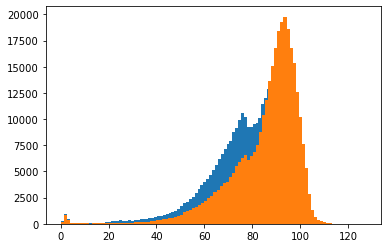

In [539]:
Y=dead_2021['Age']
plt.hist(Meuf['Age'],bins=100)
plt.hist(Kem['Age'],bins=100)

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

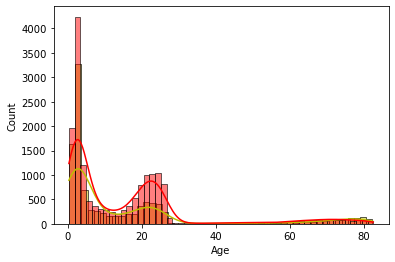

In [562]:
Meuf=dead_2021[dead_2021['Sexe']==2]
Kem=dead_2021[dead_2021['Sexe']==1]

sns.histplot(Meuf['Age'],kde=True,color="y")
sns.histplot(Kem['Age'],kde=True,color="r")
sns.histplot  

<AxesSubplot:xlabel='DOB_AAAA', ylabel='Age'>

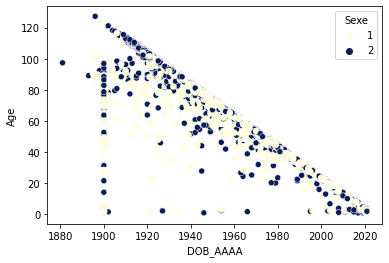

In [541]:
sns.scatterplot(x=dead_2021['DOB_AAAA'],y=dead_2021['Age'],hue=dead_2021['Sexe'],palette='YlGnBu')

<AxesSubplot:xlabel='Sexe', ylabel='Age'>

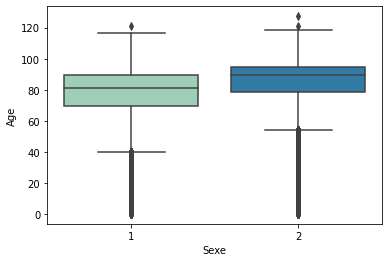

In [542]:
sns.boxplot(x=dead_2021['Sexe'],y=dead_2021['Age'],palette='YlGnBu')

(0.0, 10000.0)

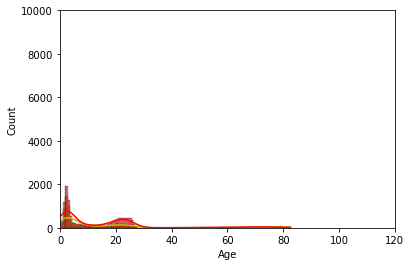

In [566]:
sns.histplot(Meuf['Age'],bins=120,kde=True,color="y")
sns.histplot(Kem['Age'],bins=120,kde=True,color="r")
plt.xlim(0, 120)
plt.ylim(0, 10000)

In [564]:
plt.show()

Text(0.5, 1.0, '2017')

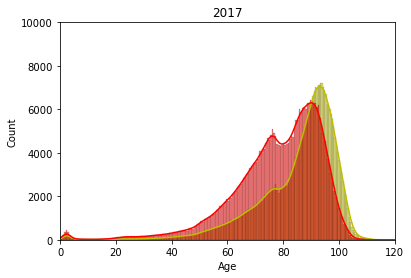

In [556]:
ax=sns.histplot(Meuf['Age'],kde=True,color="y")
ax=sns.histplot(Kem['Age'],kde=True,color="r")
ax.set(xlim=(0,120),ylim=(0, 10000))
ax.set_title('2017')
ax.remove

In [557]:
ax

<AxesSubplot:title={'center':'2017'}, xlabel='Age', ylabel='Count'>